## Tarea 1: Análisis de datos de Unimorph
- Fecha de entrega: martes 5 de octubre.
- Modalidad: crear la carpeta **tarea-1** en su cuenta de github. 
- La tarea es **individual** pero la **discusión grupal es recomendada.**
- Elija una lengua en [datos](https://github.com/orgs/unimorph/repositories). Elija una lengua distinta a la lengua ejemplo (Yanesha)
- En la carpeta "datos", hay archivos para algunas lenguas. Puede elegir otra :)
- **Recomendación:** implemente de forma ordenada y con comentarios. Trate, en lo posible, de poner comentarios en cada línea.
- No duden en preguntar en caso de cualquier problema!

## Leemos el archivo
Asumimos que la carpeta tarea-1 tiene adentro dos cosas: archivo de datos (de la lengua elegida) en la carpeta "datos", código en formato ipynb (notebook!). A modo de ejemplo, elegimos **Yanesha** para explicar los pasos de la tarea. 

In [1]:
## archivo en carpeta "datos"
## ron: Rumano

import pandas as pd

## noten que especificamos la ruta
## ron
datos = pd.read_csv('ron', sep='\t', header=None)
## puede cambiar estos nombres si lo desea
datos.columns = ['lemas','inflexiones','códigos']

In [2]:
## vamos a trabajar solo con verbos!

datos = datos[datos['códigos'].str.startswith('V')]

In [3]:
## nuestros datos!!! Cada fila indica una forma original, una inflexión del verbo y las coordenadas de la inflexión.

datos

,lemas,inflexiones,códigos
16,gravita,gravita,V;IND;PST;3;SG;IPFV
17,gravita,gravitasem,V;IND;PST;1;SG;PRF
18,gravita,gravitează,V;IND;PRS;3;PL
19,gravita,să gravitezi,V;SBJV;PRS;2;SG
20,gravita,gravitat,V.PTCP;PST
...,...,...,...
80134,goli,să golească,V;SBJV;PRS;3;SG
80135,goli,goleam,V;IND;PST;1;PL;IPFV
80136,goli,goliserăți,V;IND;PST;2;PL;PRF
80137,goli,să golească,V;SBJV;PRS;3;PL


### Estos son nuestros datos! 3 listas!

In [4]:
## definamos conjuntos de lemas, inflexiones y códigos para cada lengua :)

#### LEMAS ####
## ron
lemas = list(datos['lemas'])

#### INFLEXIONES ####
## ron
inflexiones = list(datos['inflexiones'])

#### CÓDIGOS ####
## ron
codigos = list(datos['códigos'])

## Preguntas

### 1. ¿Cuántos lemas distintos hay?

In [5]:
## Defina la lista lemas_distintos, que guarda los lemas distintos de la lista lemas

lemas_distintos = []
## use un ciclo for para recorrer la lista lemas. Use una condición if

In [6]:
## lema es una variable que en cada iteración se reasigna a un elemento de la lista lemas
for lema in lemas:
    ## usamos un if dentro de un ciclo for para ingresar los lemas que no están dentro de la nueva lista: lemas_distintos
    if lema not in lemas_distintos:
        lemas_distintos+=[lema]

In [7]:
## medimos el largo de la lista lemas_distintos
len(lemas_distintos)

1216

In [8]:
## para comprobar, visualizamos la lista lemas_distintos
lemas_distintos[:20]

['gravita',
 'greși',
 'grăbi',
 'grăi',
 'gudura',
 'gusta',
 'guverna',
 'gâdila',
 'gâmba',
 'gândi',
 'găsi',
 'găti',
 'găuri',
 'hali',
 'halucina',
 'hiberna',
 'holba',
 'hotărî',
 'hrăni',
 'hămesi']

### 2. ¿Cuántas inflexiones hay por lema distinto?

In [9]:
## Calcule la división entre el número de inflexiones y el número de lemas distintos

inflexiones_por_lema_distinto = 0

In [10]:
## medimos el largo de la lista inflexiones
len(inflexiones)

44992

In [11]:
inflexiones_por_lema_distinto = len(inflexiones) / len(lemas_distintos)

In [12]:
## calculamos la división 
inflexiones_por_lema_distinto

37.0

### 3. Defina la lista tokens_codigos, en que cada código está tokenizado por ";"

In [13]:
tokens_codigos = []
## use un ciclo for para recorrer la lista codigos. En cada iteración, use split(';') y guarde el resultado en tokens_codigos

In [14]:
## guardamos los strings tokenizados en la lista tokens_codigos
for string in codigos:
    ## cortamos por ";"
    tokens_codigos+=[string.split(';')]

In [15]:
## para comprobar, visualizamos la lista tokens_codigos
tokens_codigos[:20]

[['V', 'IND', 'PST', '3', 'SG', 'IPFV'],
 ['V', 'IND', 'PST', '1', 'SG', 'PRF'],
 ['V', 'IND', 'PRS', '3', 'PL'],
 ['V', 'SBJV', 'PRS', '2', 'SG'],
 ['V.PTCP', 'PST'],
 ['V', 'POS', 'IMP', '3', 'PL'],
 ['V', 'IND', 'PRS', '2', 'SG'],
 ['V', 'IND', 'PST', '1', 'PL', 'PRF'],
 ['V', 'POS', 'IMP', '2', 'SG'],
 ['V', 'IND', 'PST', '2', 'PL', 'PFV'],
 ['V', 'IND', 'PST', '2', 'SG', 'IPFV'],
 ['V', 'NEG', 'IMP', '3', 'PL'],
 ['V', 'SBJV', 'PRS', '2', 'PL'],
 ['V', 'IND', 'PST', '1', 'SG', 'PFV'],
 ['V', 'IND', 'PST', '3', 'PL', 'IPFV'],
 ['V', 'IND', 'PRS', '3', 'SG'],
 ['V', 'SBJV', 'PRS', '1', 'SG'],
 ['V', 'IND', 'PST', '3', 'PL', 'PFV'],
 ['V.CVB', 'PRS'],
 ['V', 'IND', 'PRS', '1', 'PL']]

### 4. ¿Cuál es el número promedio de símbolos usados para describir las inflexiones?

In [16]:
numero_inflexiones = 0

## recorra la lista tokens_codigos con un ciclo for. En cada iteración, guarde el largo de la sublista en numero_inflexiones.
## Finalmente, divida el largo de la lista numero_inflexiones por el número de la lista tokens_codigos!

In [17]:
## Antes de ejecutar un ciclo for a la lista tokens_codigos, creamos la lista numero_inflexiones con valor cero para que guarde el largo de las inflexiones

for item in tokens_codigos:
    N=len(item)
    numero_inflexiones+=N

In [18]:
## medimos el número de inflexiones
numero_inflexiones

235904

In [19]:
## medimos el largo de la lista tokens_codigos
len(tokens_codigos)

44992

In [20]:
## Finalmente, creamos la lista promedio_inflexiones con valor cero para que guarde el promedio de inflexiones 

promedio_inflexiones = 0

promedio_inflexiones = numero_inflexiones / len(tokens_codigos)

In [21]:
## calculamos la división que nos indica el promedio de códigos que corresponden a cada inflexión
promedio_inflexiones

5.243243243243243

### 5. Ahora, tokens_codigos es una lista de listas. Defina la lista lista_codigos, que guarda todos los strings usados para describir las inflexiones

In [22]:
lista_codigos = []
## use un ciclo for para recorrer la lista tokens_codigos. En cada iteración, use otro ciclo for, que recorra la sublista, y 
## guarde los strings en lista_codigos

## para resolver este problema, necesito iterar con un ciclo for sobre los elementos de tokens_codigos. Como cada elemento
## es también una lista, podemos recorrerlo con otro ciclo for. 

In [23]:
## recorremos con un ciclo for las sublistas de tokens_codigos
for sub_lista in tokens_codigos:
    ## el segundo ciclo for recorre los items dentro de sub_lista
    for item in sub_lista:
        lista_codigos+= [item]

In [24]:
## para comprobar, visualizamos lista_codigos
lista_codigos[:15]

['V',
 'IND',
 'PST',
 '3',
 'SG',
 'IPFV',
 'V',
 'IND',
 'PST',
 '1',
 'SG',
 'PRF',
 'V',
 'IND',
 'PRS']

### 6. ¿Cuántos símbolos se utilizan para definir las inflexiones?

In [25]:
## Defina la lista simbolos_distintos, que guarda los simbolos distintos de lista_codigos

simbolos_distintos = []
## use un ciclo for para recorrer la lista lista_codigos. 

In [26]:
## simbolo es una variable que en cada iteración se reasigna a un elemento de lista_codigos
for simbolo in lista_codigos:
    ## usamos un if para ingresar los símbolos que no están dentro de la nueva lista simbolos_distintos
    if simbolo not in simbolos_distintos:
        simbolos_distintos+=[simbolo]

In [27]:
## para comprobar, visualizamos los elementos de la lista simbolos_distintos
simbolos_distintos

['V',
 'IND',
 'PST',
 '3',
 'SG',
 'IPFV',
 '1',
 'PRF',
 'PRS',
 'PL',
 'SBJV',
 '2',
 'V.PTCP',
 'POS',
 'IMP',
 'PFV',
 'NEG',
 'V.CVB',
 'NFIN']

### 7. Construya la lista triple_datos en donde cada elemento tiene la forma [lema,inflexión,código]

In [28]:
triple_datos = []

## recorra las listas usando los índices!

In [29]:
## recorremos los índices de las tres listas tomando en cuenta que cada lista tiene el mismo largo
for i in range(len(lemas)):
    ## integramos los elementos en la lista triple_datos y agregamos un espacio
    integracion = lemas[i]+" "+inflexiones[i]+" "+codigos[i]
    S = integracion.split ()
    triple_datos+=[S]

In [30]:
## para comprobar, visualizamos los elementos de la lista triple_datos
triple_datos [:20]

[['gravita', 'gravita', 'V;IND;PST;3;SG;IPFV'],
 ['gravita', 'gravitasem', 'V;IND;PST;1;SG;PRF'],
 ['gravita', 'gravitează', 'V;IND;PRS;3;PL'],
 ['gravita', 'să', 'gravitezi', 'V;SBJV;PRS;2;SG'],
 ['gravita', 'gravitat', 'V.PTCP;PST'],
 ['gravita', 'gravitați', 'V;POS;IMP;3;PL'],
 ['gravita', 'gravitezi', 'V;IND;PRS;2;SG'],
 ['gravita', 'gravitaserăm', 'V;IND;PST;1;PL;PRF'],
 ['gravita', 'gravitează', 'V;POS;IMP;2;SG'],
 ['gravita', 'gravitarăți', 'V;IND;PST;2;PL;PFV'],
 ['gravita', 'gravitai', 'V;IND;PST;2;SG;IPFV'],
 ['gravita', 'nu', 'gravitați', 'V;NEG;IMP;3;PL'],
 ['gravita', 'să', 'gravitați', 'V;SBJV;PRS;2;PL'],
 ['gravita', 'gravitai', 'V;IND;PST;1;SG;PFV'],
 ['gravita', 'gravitau', 'V;IND;PST;3;PL;IPFV'],
 ['gravita', 'gravitează', 'V;IND;PRS;3;SG'],
 ['gravita', 'să', 'gravitez', 'V;SBJV;PRS;1;SG'],
 ['gravita', 'gravitară', 'V;IND;PST;3;PL;PFV'],
 ['gravita', 'gravitând', 'V.CVB;PRS'],
 ['gravita', 'gravităm', 'V;IND;PRS;1;PL']]

### 8. ¿Existen códigos para los cuales el lema es igual a su inflexión? Defina la lista lema_igual_inflexion, que en cada posición pone 1 si son iguales, o 0 en otro caso.

In [39]:
lema_igual_inflexion = []

## recorra la lista triple_datos. En cada interación, use una condición if. 

## usamos un ciclo for para recorrer las sublistas dentro de la lista triple_datos
for elementos in triple_datos:
    ## usamos otro ciclo for para recorrer los items dentro de las sublistas elementos
    for item in range(len(elementos)):
        ## empleamos una condición if que compare los items de los lemas e inflexiones 
        ## donde se indique 1 cuando son iguales y 0 en otros casos
        if elementos[0] == elementos[1]:
            lema_igual_inflexion += "1"
        else:
            lema_igual_inflexion += "0"

In [40]:
## Visualizamos la nueva lista que nos muestra los casos en los que el lema y su inflexión coinciden (1), y en los que no (0).
lema_igual_inflexion [:10]

['1', '1', '1', '0', '0', '0', '0', '0', '0', '0']

### 9. Usemos una librería!

In [44]:
!pip install jellyfish

In [45]:
## la distancia de hamming permite calcular la distancia entre strings. Un alto valor de la distancia de Hamming implica que los
## strings son distintos

import jellyfish as JF

JF.hamming_distance("a'chenkateñets","a'chenkateñet")

1

In [46]:
## a partir de la lista triple_datos, construya la lista distancia_largo_codigos, en que cada elemento tiene la forma [JF.hamming_distance(codigo,inflexión),largo(codigo)]

distancia_largo_codigos = []
item = ['achenkateñets','achenkateñets','V;NFIN']

distancia_largo_codigos = [[3,8],[0,6]]

In [47]:
## usamos un ciclo for para recorrer las sublistas dentro de la lista triple_datos
for sublista in triple_datos:
    ## usamos otro ciclo for para recorrer los items dentro sublistas
    for item in range(len(sublista)):
        ## usamos la función de distancia hamming e introducimos los datos en la lista distancia_largo_codigos
        medicion = JF.hamming_distance(sublista[0],sublista[1]),len(sublista[0])
        distancia_largo_codigos += [medicion]

In [49]:
## Visualizamos las medidas de Hamming aplicadas al lema y inflexión.
distancia_largo_codigos[:20]

[[3, 8],
 [0, 6],
 (0, 7),
 (0, 7),
 (0, 7),
 (3, 7),
 (3, 7),
 (3, 7),
 (4, 7),
 (4, 7),
 (4, 7),
 (7, 7),
 (7, 7),
 (7, 7),
 (7, 7),
 (1, 7),
 (1, 7),
 (1, 7),
 (2, 7),
 (2, 7)]

### 10. Extraiga dos listas de distancia_largo_codigos: distancias y largo_codigos, que guardan las distancias entre lemas e inflexiones, y el largo de los códigos

In [50]:
distancias = []
largo_codigos = []

In [51]:
for sublista in distancia_largo_codigos:
    distancias += [sublista[0]]
    largo_codigos += [sublista[1]]

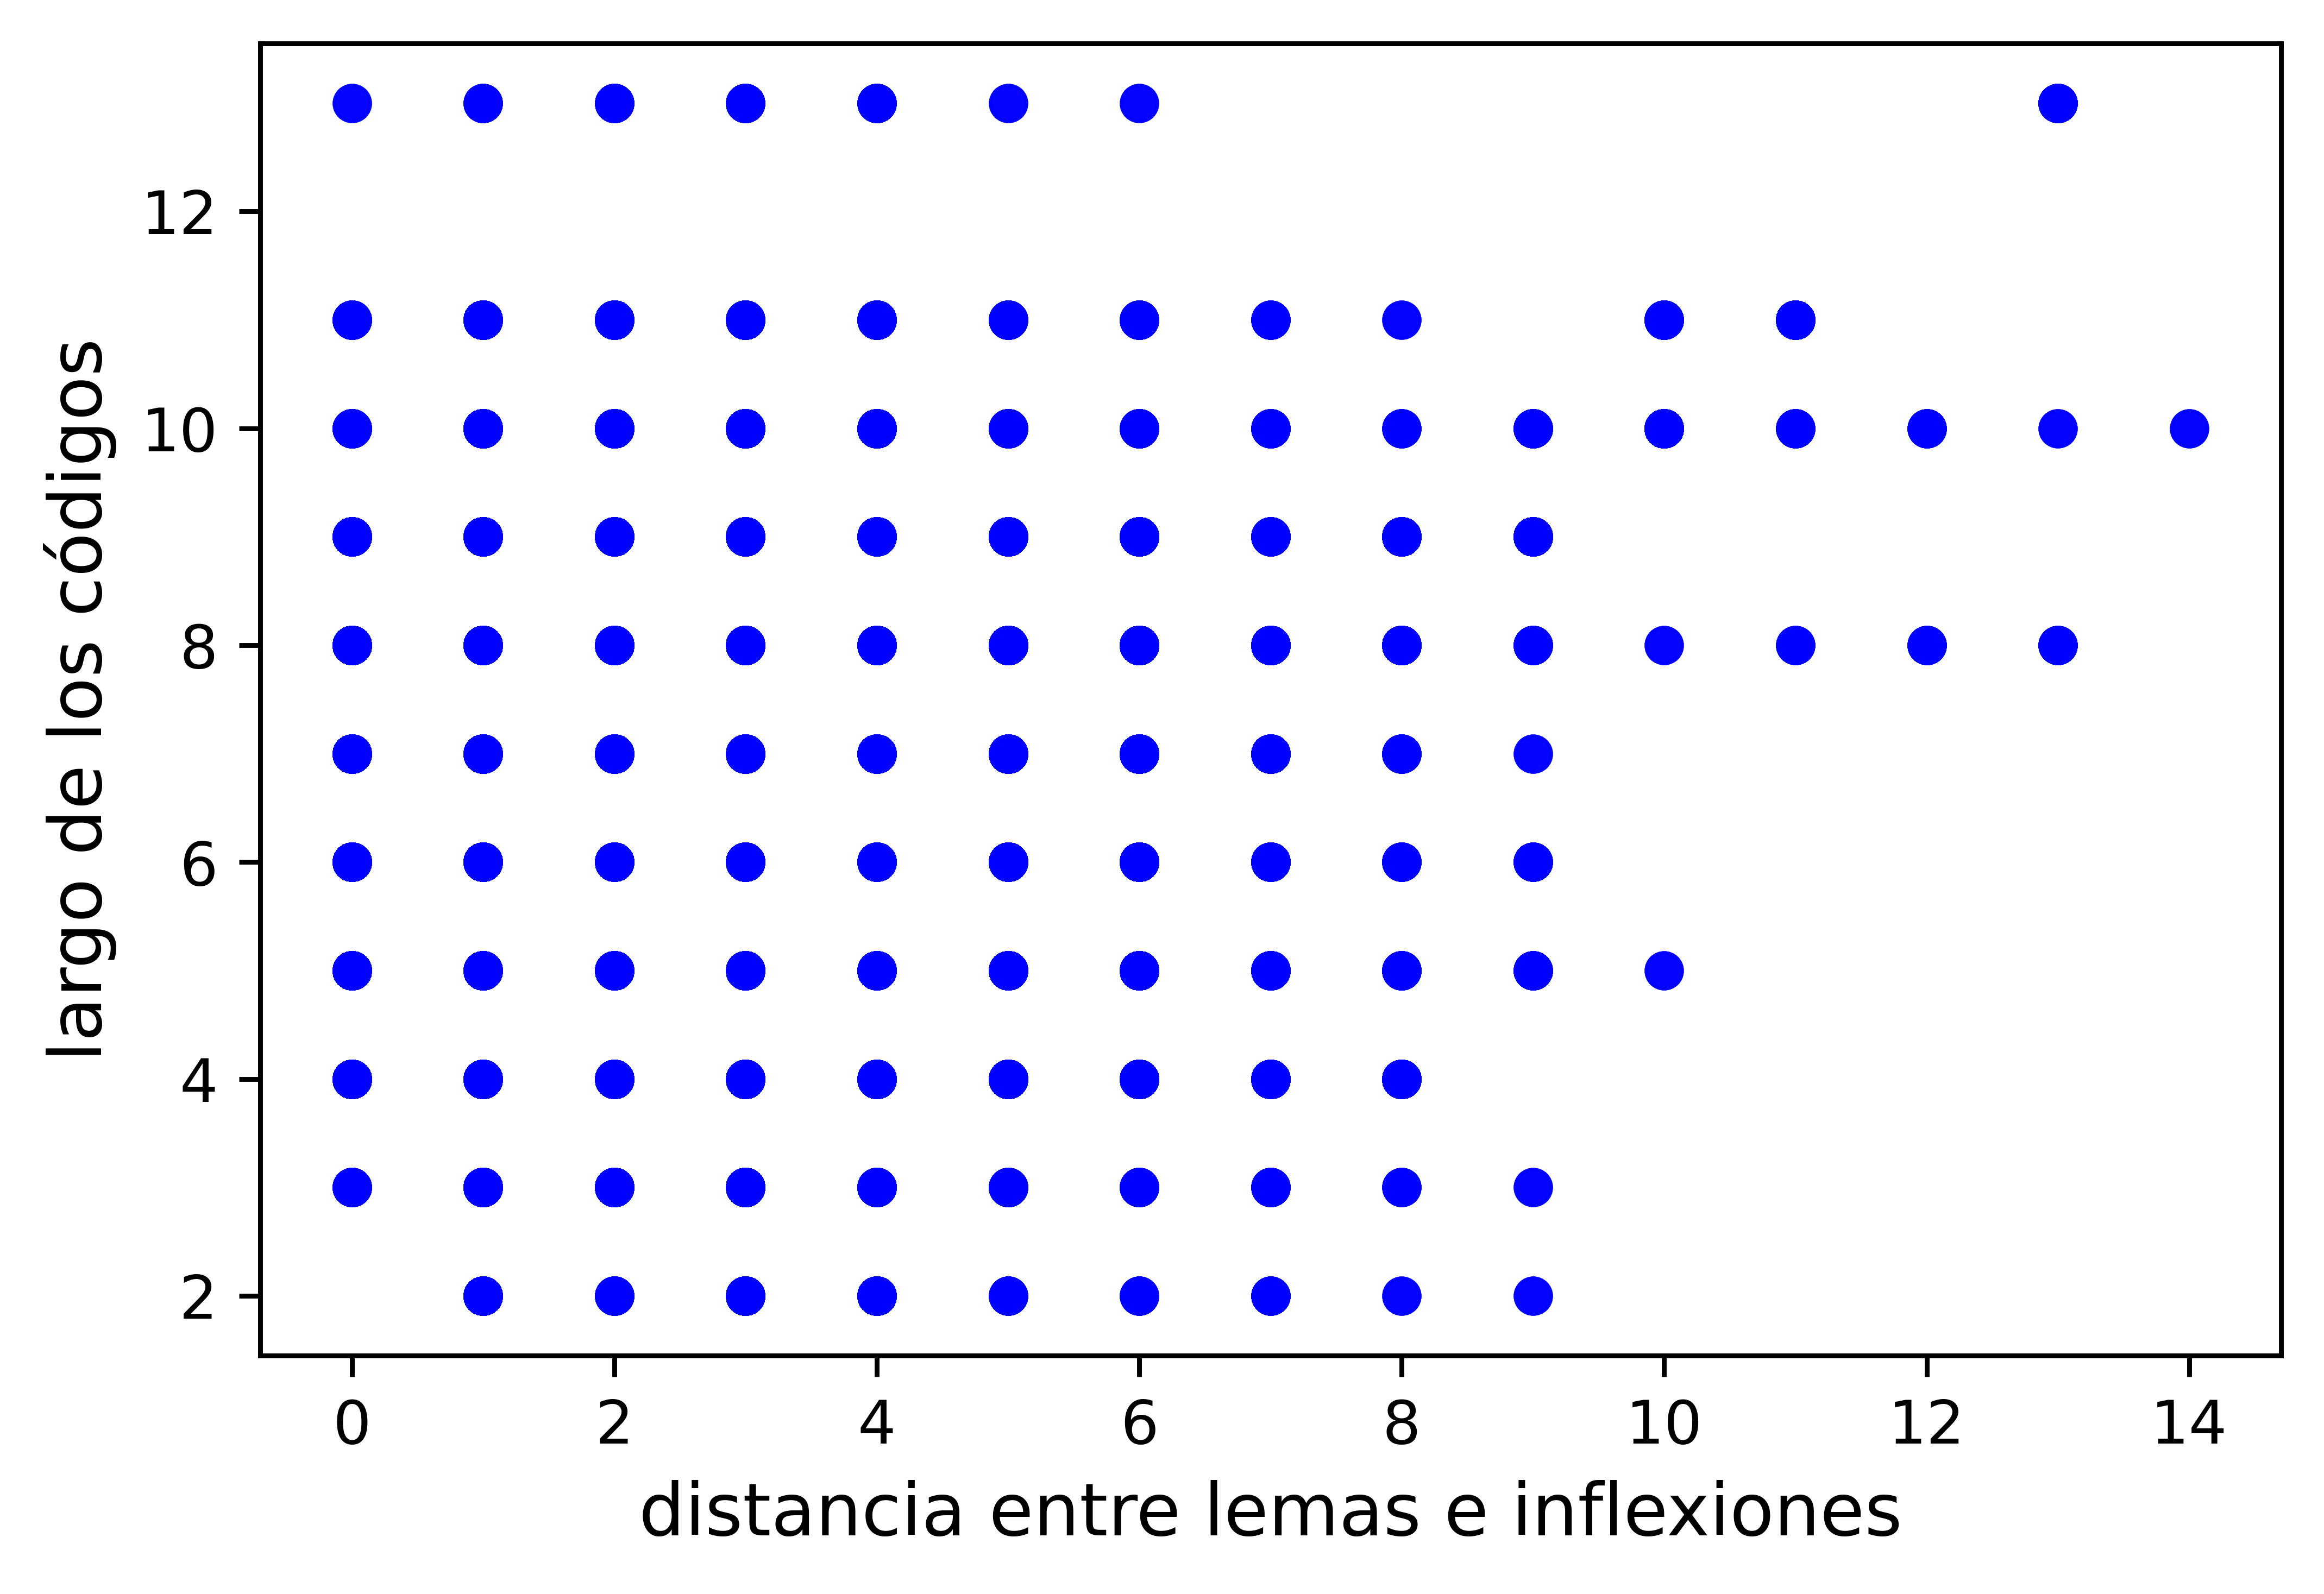

In [53]:
## ejecute el siguiente código!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
    
ax.plot(distancias,largo_codigos,linewidth=0,marker='o',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='b',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel('largo de los códigos',fontsize=12)
plt.xlabel('distancia entre lemas e inflexiones',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('distanciavslargo.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 11. Responda las siguientes preguntas. 
- ¿A partir de los cálculos realizados, qué podemos decir sobre la tipología morfológica de la lengua estudiada? Use en su respuesta algo de los cálculos realizados en relación a inflexiones y lemas. Puede explicar los calculos propuestos de manera informal.
- ¿Qué otros cálculos podrían hacerse?

a. - Tras la resolución de la tarea y el gráfico podemos decir que el rumano es una lengua parcialmente síntetica 
     debido a que gran parte de su morfología verbal presenta aglutinancia y en otros casos las funciones temporales y 
     modales se expresan mediante uno o dos verbos auxiliares (aislantes).

b.  - Realizar otros cálculos que permitan visualizar otra dimensión como la recurrencia, es decir medir la cantidad de veces 
      que se dan ciertas distancias.
    - Realizar los mismos cálculos con los datos que tenemos sobre la flexión nominal
    - Comparar los resultados con otras lenguas (sobre todo con las lenguas emparentadas)